## Import Python Modules and Notebooks

The python notebook file `InitializationOfFunctions.ipynb` runs several other notebook files that imports python modules as well as initializing other user defined functions related to clustering algorithms.

In [1]:
%run ../../PythonNotebook_InitializationOfFunctions/InitializationOfFunctions.ipynb

In [2]:
print("Sklearn vesrion:           ", sk.__version__)
print("Pandas version:            ",pd.__version__)
print("Numpy version:             ", np.__version__)
print("Scipy verson:              ", sc.__version__)

Sklearn vesrion:            0.21.1
Pandas version:             0.23.4
Numpy version:              1.16.3
Scipy verson:               1.2.1


#### Load Iris Dataset

In [3]:
#----------------------------------------------------
iris = datasets.load_iris()
X, y = iris.data,  iris.target
iris = X, y
# -----------------------------------------------------


# #----------------------------------------------------
# breast = datasets.load_breast_cancer()
# X, y = breast.data, breast.target
# breast = X, y
# #-----------------

Check the attributes of the datasets

In [4]:
# size of the dataset
print('Dimension of datasets: \n', X.shape)
# number of clusters
cluster_label, cluster_size = np.unique(y, return_counts=True)
print('Cluster labels: \n', cluster_label)
print('Sample per cluster: \n', cluster_size)

Dimension of datasets: 
 (150, 4)
Cluster labels: 
 [0 1 2]
Sample per cluster: 
 [50 50 50]


`Using all four features dimensions: tune parameters`

In [35]:
dataset_iris = [(iris, {'name': 'iris', 'n_cluster': 4})]
y_pred_4d, metric_4d = optimize_parameters_and_run_algorithms(dataset_iris)


Dataset iris =====

Optimizing Parameters:  Kmean =====

Total Parameter Settings:  4


  algorithm       init  n_clusters  score_l2
0      full  k-means++           2  0.681046
1      full  k-means++           3  0.552819
2      full  k-means++           4  0.498051
3      full  k-means++           5  0.488749

Optimizing Parameters: Agglomerative single-linkage =====

Total Parameter Settings:  4


    affinity linkage  n_clusters  score_l2
0  euclidean  single           2  0.686735
1  euclidean  single           3  0.512111
2  euclidean  single           4  0.281939
3  euclidean  single           5  0.283812

Optimizing Parameters: Agglomerative complete-linkage =====

Total Parameter Settings:  4


    affinity   linkage  n_clusters  score_l2
0  euclidean  complete           2  0.515983
1  euclidean  complete           3  0.513595
2  euclidean  complete           4  0.499813
3  euclidean  complete           5  0.346174

Optimizing Parameters: Agglomerative average-linkage =====

T

The outputs of the optimization step show that the optimal parameters obtained for each clustering algorithm are different than the true parameters. The actual number of the cluster in the dataset is three, however, all the algorithms found two number of clusters. Let us look into the silhouette plots of the clustering results. 

In [54]:
y_pred_4d[0][0][1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
iris_kmeans_score = metrics.adjusted_rand_score(iris[1],y_pred_4d[0][0][1])

# Print the score
iris_kmeans_score

0.5399218294207123

In [7]:
for i, (algo_name, label) in enumerate(y_pred_4d[0]):
    print('Algorithm: ', algo_name)

Algorithm:  kmean
Algorithm:  dbscan
Algorithm:  spectral_c
Algorithm:  gmm
Algorithm:  agglo-single
Algorithm:  agglo-complete
Algorithm:  agglo-average
Algorithm:  agglo-ward


#### Silhouette Plot in 4-dimension

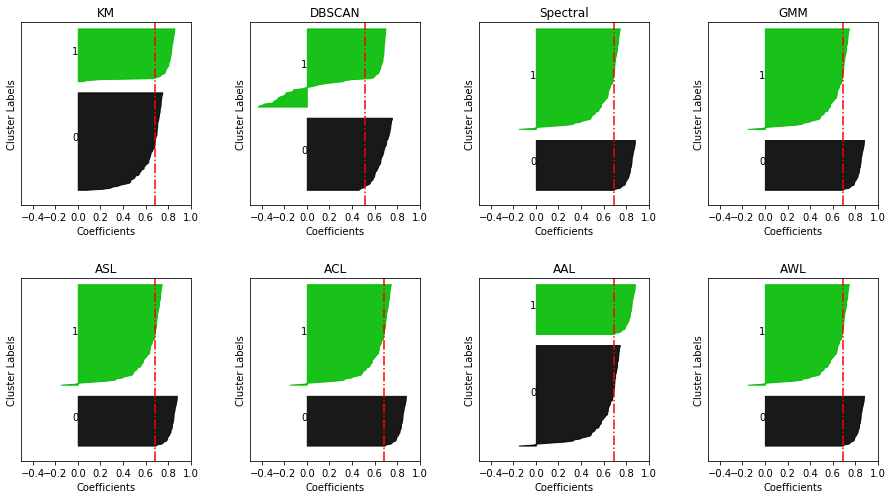

In [36]:
a_name = ['KM', 'ASL', 'ACL', 'AAL', 'AWL', 'DBSCAN', 'Spectral', 'GMM']
algo_names = ['KM', 'DBSCAN', 'Spectral', 'GMM']
algo_names2 = ['ASL', 'ACL', 'AAL', 'AWL']


# how many algorithms
n_col = 4
n_row = 2
fig_num_row1 = 0
fig_num_row2 = 0
count = 0

fig1 = plt.figure(figsize=(n_col*f_w, n_row*f_h))
plt.subplots_adjust(top=0.95, bottom=0.08, left=0.10, right=0.95, hspace=0.4,
                    wspace=0.35)

for i, (algo_name, algo_label) in enumerate(y_pred_4d[0]):
    
#     # save results of four algo
    if i!=1 and i!=2 and i!=3 and i!=4: 
        
        fig_num_row1 += 1 
        
        plt.subplot(n_row, n_col, fig_num_row1)
        ax_row2 = plt.gca()
    
        silhouette_plot_only(X, algo_label, ax_row2)
        ax_row2.set_title(a_name[i])
    
    if i!=0 and i!=5 and i!=6 and i!=7:
        
        fig_num_row2 += 1

        plt.subplot(n_row, n_col, fig_num_row2+n_col)
        ax_row4 = plt.gca()
    
        silhouette_plot_only(X, algo_label, ax_row4)
        ax_row4.set_title(a_name[i])

        

# # save this figure in the folder "images" in the current working directory
# current_dir = %pwd
# image_path = "".join([current_dir, '\\results_iris_dataset'])
# plt.savefig("".join([image_path,"\\result1_iris_dataset.pdf"]));
# plt.show() # this step should come after saving figure

The silhouette plots above illustrate that the partition of datapoints are unbalanced; different vertical heights for two clusters indicates this. We know that each cluster has 50 samples originally, so this partition cannot be optimal. Surprisingly, both clusters (each individual graph) have the silhouette score slightely above the average silhouette, which may indicate good clustering results. This might be the case if two clusters are very close to each other in the dataset. However, we know that there are three clusters in the iris dataset. Let us further investigate what happens when the algoriths are fed with true parameters. 

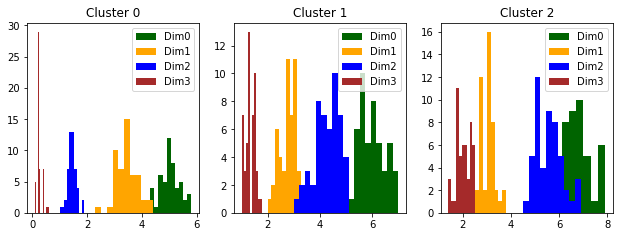

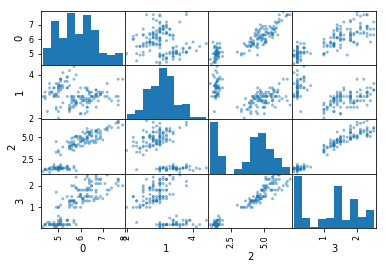

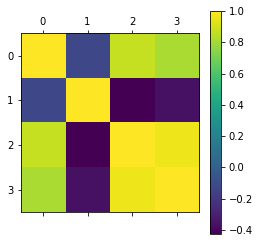

In [28]:
# basic parameters
n_neighbours = 10
n_classes = 3

# set algorithm parameters ------------
para_km = {'n_clusters': n_classes,
          'init': 'k-means++',
           'algorithm': 'full'
          }

para_single = {'n_clusters': n_classes,
                'linkage': 'single', 
                'affinity': 'euclidean'
              }

para_complete = {'n_clusters': n_classes,
                'linkage': 'complete', 
                'affinity': 'euclidean'
              }

para_average = {'n_clusters': n_classes,
                'linkage': 'average', 
                'affinity': 'euclidean'
              }

para_ward = {'n_clusters': n_classes,
                'linkage': 'ward', 
                'affinity': 'euclidean'
              }

para_gmm = {'n_components': n_classes,
            'covariance_type': 'full',
            'init_params': 'kmeans',
            'n_init': 15
           }

para_sc = {'n_clusters': n_classes,
           'affinity': 'nearest_neighbors',
           'n_neighbors': n_neighbours,
           'assign_labels' : 'kmeans' #, 'discretize']
          }

plot_cluster_hist(iris)
# plot scatter matrix 
df_iris_data = pd.DataFrame(iris[0])
pd.plotting.scatter_matrix(df_iris_data);

# plot correlation
plt.matshow(df_iris_data.corr());
plt.xticks(range(len(df_iris_data.columns)), df_iris_data.columns)
plt.yticks(range(len(df_iris_data.columns)), df_iris_data.columns)
plt.colorbar()
plt.show()


`Analyze with true parameters: 4-dimension`


Dataset: Iris



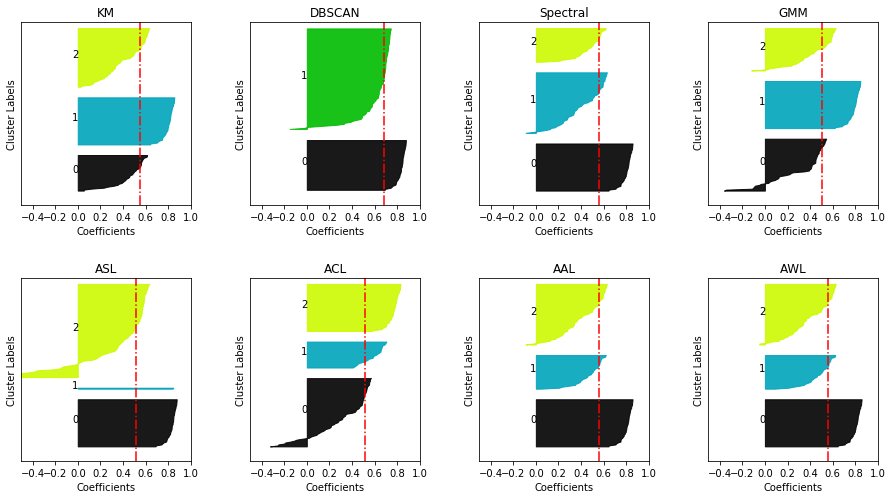

In [37]:
print()
print('Dataset: ' + 'Iris')
print()

# run algorithms    
label_km, model_km = get_cluster_label_kmean(iris[0], para_km, is_model=True)
label_single = get_cluster_label_agglo(iris[0], para_single)
label_complete = get_cluster_label_agglo(iris[0], para_complete)
label_average = get_cluster_label_agglo(iris[0], para_average)
label_ward = get_cluster_label_agglo(iris[0], para_ward)
label_gmm = get_cluster_label_gmm(iris[0], para_gmm)

para_sc, _ = get_parameter_sc(iris, n_comp=n_classes, display_results=False)
label_sc = get_cluster_label_sc(iris[0], para_sc)

para_dbscan, _ = get_parameter_dbscan(iris, eps_range, min_point_range, 50, display_results=False)
label_dbscan = get_cluster_label_dbscan(iris[0], para_dbscan)
# maintain this order
pred_labels = [label_km, label_dbscan, label_sc, label_gmm, label_single, label_complete, label_average, label_ward]
# print results
# inside_avg_score = get_and_plot_silhouette_scores(iris[0], pred_labels, algo_name)
algo_names = ['KM', 'DBSCAN', 'Spectral', 'GMM', 'ASL', 'ACL', 'AAL', 'AWL']

# how many algorithms
n_col = 4
n_row = 2
fig_num_row1 = 0
fig_num_row2 = 0
count = 0

fig1 = plt.figure(figsize=(n_col*f_w, n_row*f_h))
plt.subplots_adjust(top=0.95, bottom=0.08, left=0.10, right=0.95, hspace=0.4,
                    wspace=0.35)

for i, (algo_name, algo_label) in enumerate(zip(algo_names, pred_labels)):
    
#     # save results of four algo
    plt.subplot(n_row, n_col, i+1)
    ax_row2 = plt.gca()
    silhouette_plot_only(iris[0], algo_label, ax_row2)
    ax_row2.set_title(algo_name)
    
           

# # save this figure in the folder "images" in the current working directory
# current_dir = %pwd
# image_path = "".join([current_dir, '\\results_iris_dataset'])
# plt.savefig("".join([image_path,"\\result2_iris_dataset.pdf"]));
# plt.show() # this step should come after saving figure

The silhouette plots illustrates that running the clustering algorithms with true parameters (except DBSAN and SC needed parameter tuning) has identified three clusters. However, the results of DBSCAN and ASL are still poor. We may doubt that one of the two clusters is very close to each other. This can be understood from the silhouette plot of ASL as it formed very unbalanced clusters, one large, one medium, and one very small clusters. Also, we observed the feature vector 3rd and 4th are highly correlated. Let us remove the 4th feature vector from the dataset and analyze the respective results.  

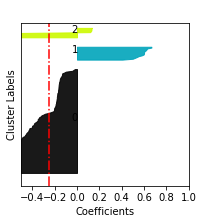

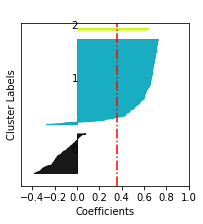

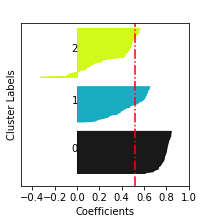

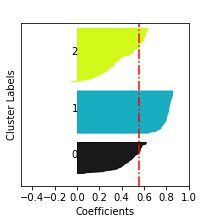

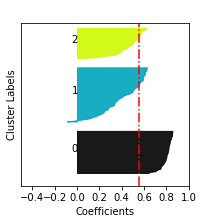

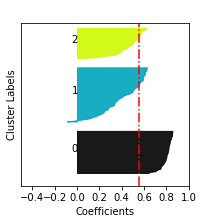

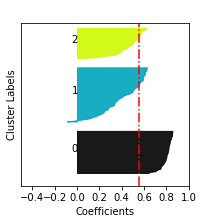

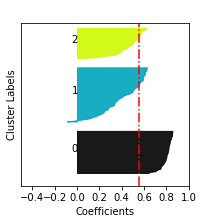

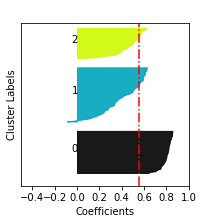

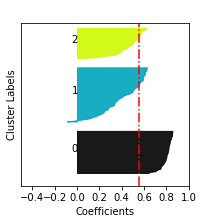

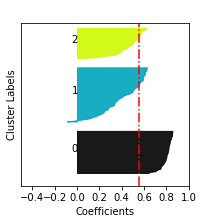

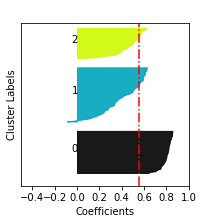

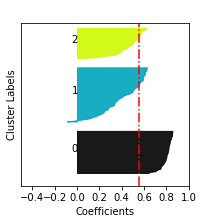

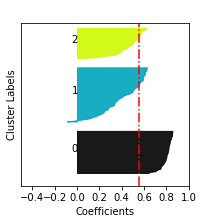

In [63]:
para_sc
for n in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    para_sc['n_neighbors'] = n
    label_sc = get_cluster_label_sc(iris[0], para_sc)
    silhouette_plot_only(iris[0], label_sc)

`Using only first three feature dimensions`

In [38]:
iris_012 = iris[0][:, (0,1,2)], iris[1]
dataset_iris_012 = [(iris_012, {'name': 'iris', 'n_cluster': 4})]
y_pred_3d, metric_3d = optimize_parameters_and_run_algorithms(dataset_iris_012)


Dataset iris =====

Optimizing Parameters:  Kmean =====

Total Parameter Settings:  4


  algorithm       init  n_clusters  score_l2
0      full  k-means++           2  0.684507
1      full  k-means++           3  0.549896
2      full  k-means++           4  0.508320
3      full  k-means++           5  0.487789

Optimizing Parameters: Agglomerative single-linkage =====

Total Parameter Settings:  4


    affinity linkage  n_clusters  score_l2
0  euclidean  single           2  0.688519
1  euclidean  single           3  0.531647
2  euclidean  single           4  0.394789
3  euclidean  single           5  0.313428

Optimizing Parameters: Agglomerative complete-linkage =====

Total Parameter Settings:  4


    affinity   linkage  n_clusters  score_l2
0  euclidean  complete           2  0.502164
1  euclidean  complete           3  0.519374
2  euclidean  complete           4  0.520163
3  euclidean  complete           5  0.374353

Optimizing Parameters: Agglomerative average-linkage =====

T

#### Silhouette Plot in 3-dimension

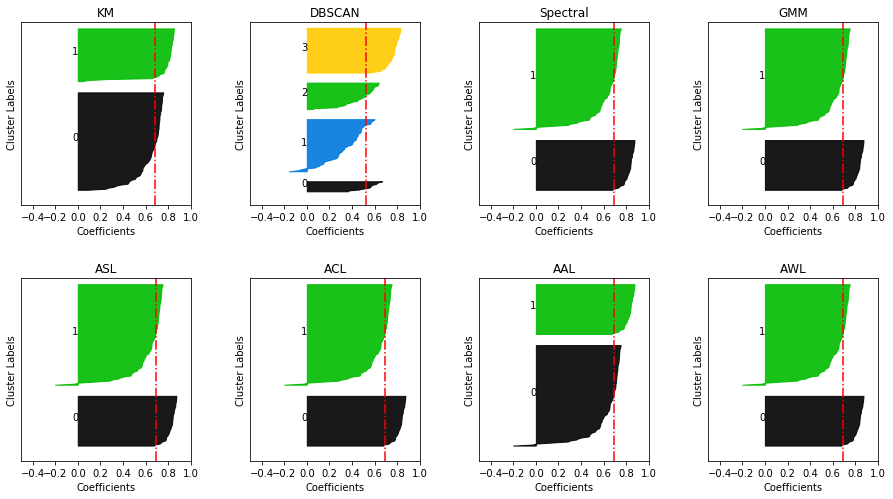

In [39]:
a_name = ['KM', 'ASL', 'ACL', 'AAL', 'AWL', 'DBSCAN', 'Spectral', 'GMM']
algo_names = ['KM', 'DBSCAN', 'Spectral', 'GMM']
algo_names2 = ['ASL', 'ACL', 'AAL', 'AWL']


# how many algorithms
n_col = 4
n_row = 2
fig_num_row1 = 0
fig_num_row2 = 0
count = 0

fig1 = plt.figure(figsize=(n_col*f_w, n_row*f_h))
plt.subplots_adjust(top=0.95, bottom=0.08, left=0.10, right=0.95, hspace=0.4,
                    wspace=0.35)

for i, (algo_name, algo_label) in enumerate(y_pred_3d[0]):
    
#     # save results of four algo
    if i!=1 and i!=2 and i!=3 and i!=4: 
        
        fig_num_row1 += 1 
        
        plt.subplot(n_row, n_col, fig_num_row1)
        ax_row2 = plt.gca()
    
        silhouette_plot_only(iris_012[0], algo_label, ax_row2)
        ax_row2.set_title(a_name[i])
    
    if i!=0 and i!=5 and i!=6 and i!=7:
        
        fig_num_row2 += 1

        plt.subplot(n_row, n_col, fig_num_row2+n_col)
        ax_row4 = plt.gca()
    
        silhouette_plot_only(iris_012[0], algo_label, ax_row4)
        ax_row4.set_title(a_name[i])

        

# # save this figure in the folder "images" in the current working directory
# current_dir = %pwd
# image_path = "".join([current_dir, '\\results_iris_dataset'])
# plt.savefig("".join([image_path,"\\result1_iris_dataset.pdf"]));
# plt.show() # this step should come after saving figure

The candicate clustering algorithm did not find the true parameters when they were tuned based on the silhouette scores after removing the 4th feature vector that was highly correlated with the 3rd feature vector. This might hint that the cluster structres are non-globular shapes. Also, notice that DBSCAN identified four clusters in this case. Let us observe what the algorithms find when the true parameters are given. 

`Analyze with true parameters: 3-dimension`


Dataset: Iris



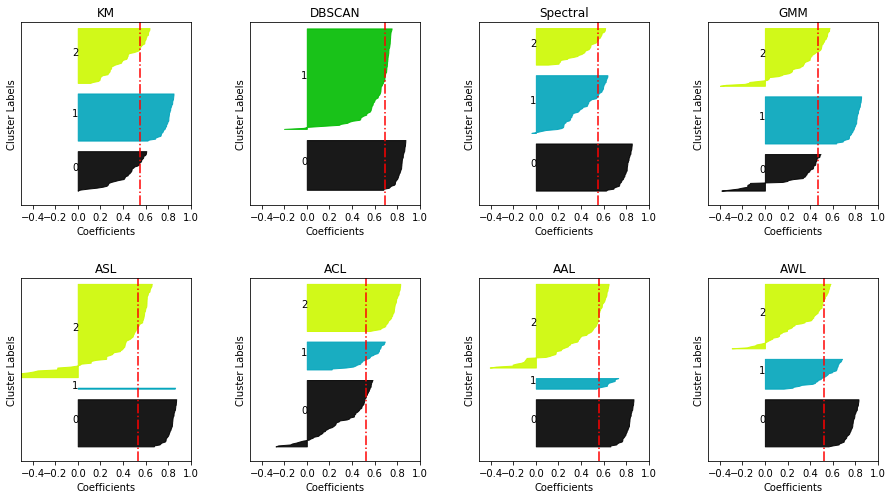

In [40]:
print()
print('Dataset: ' + 'Iris')
print()

# run algorithms    
label_km, model_km = get_cluster_label_kmean(iris_012[0], para_km, is_model=True)
label_single = get_cluster_label_agglo(iris_012[0], para_single)
label_complete = get_cluster_label_agglo(iris_012[0], para_complete)
label_average = get_cluster_label_agglo(iris_012[0], para_average)
label_ward = get_cluster_label_agglo(iris_012[0], para_ward)
label_gmm = get_cluster_label_gmm(iris_012[0], para_gmm)

para_sc, _ = get_parameter_sc(iris_012, n_comp=n_classes, display_results=False)
label_sc = get_cluster_label_sc(iris_012[0], para_sc)

para_dbscan, _ = get_parameter_dbscan(iris_012, eps_range, min_point_range, 50, display_results=False)
label_dbscan = get_cluster_label_dbscan(iris_012[0], para_dbscan)
# maintain this order
pred_labels = [label_km, label_dbscan, label_sc, label_gmm, label_single, label_complete, label_average, label_ward]
# print results
# inside_avg_score = get_and_plot_silhouette_scores(iris[0], pred_labels, algo_name)
algo_names = ['KM', 'DBSCAN', 'Spectral', 'GMM', 'ASL', 'ACL', 'AAL', 'AWL']

# how many algorithms
n_col = 4
n_row = 2
fig_num_row1 = 0
fig_num_row2 = 0
count = 0

fig1 = plt.figure(figsize=(n_col*f_w, n_row*f_h))
plt.subplots_adjust(top=0.95, bottom=0.08, left=0.10, right=0.95, hspace=0.4,
                    wspace=0.35)

for i, (algo_name, algo_label) in enumerate(zip(algo_names, pred_labels)):
    
#     # save results of four algo
    plt.subplot(n_row, n_col, i+1)
    ax_row2 = plt.gca()
    silhouette_plot_only(iris_012[0], algo_label, ax_row2)
    ax_row2.set_title(algo_name)
    
           

# # save this figure in the folder "images" in the current working directory
# current_dir = %pwd
# image_path = "".join([current_dir, '\\results_iris_dataset'])
# plt.savefig("".join([image_path,"\\result3_iris_dataset.pdf"]));
# plt.show() # this step should come after saving figure

The figure above illustrates that except DBSCAN, ASL, and AAL other algorithms are able to detect the cluster structures in the iris dataset with some misclassification points.

In [9]:
iris_012 = iris[0][:, (0,1,2)], iris[1]

Let us scrutinize the results of individual clustering algorithms.

Number of smaples in each clusters: 
 (array([0, 1, 2]), array([42, 50, 58], dtype=int64))


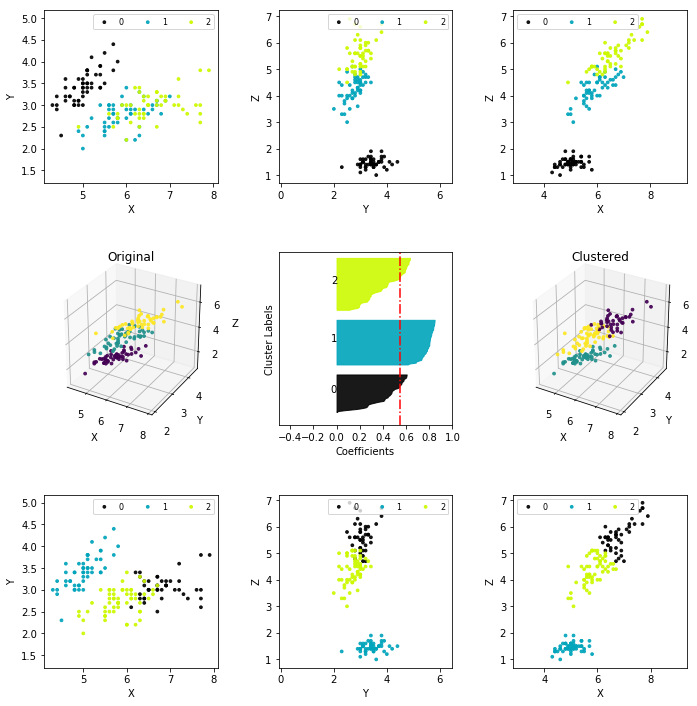

In [11]:
iris3d_km = analyse_3d_dataset_one(iris_012, algorithm='Kmean')

Number of smaples in each clusters: 
 (array([0, 1]), array([ 50, 100], dtype=int64))


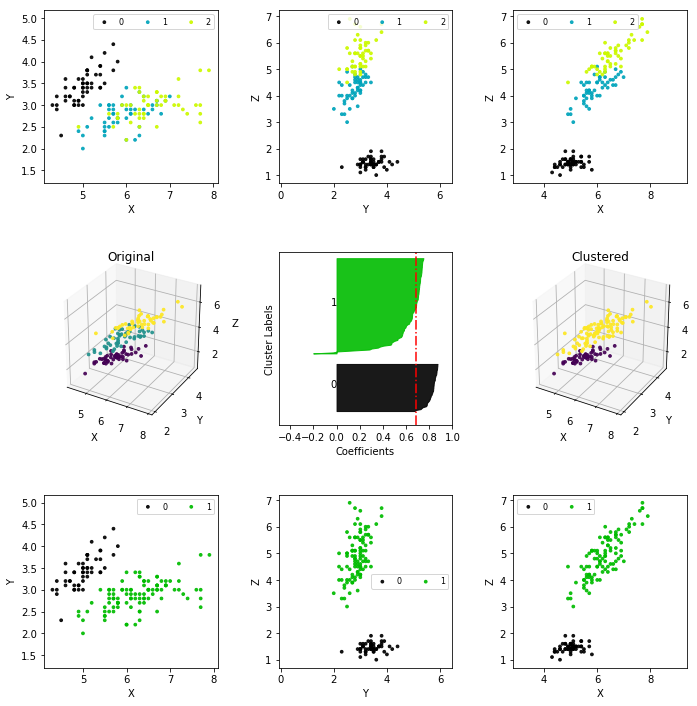

In [12]:
iris3d_dbscan = analyse_3d_dataset_one(iris_012, algorithm='DBSCAN')

Number of smaples in each clusters: 
 (array([0, 1, 2], dtype=int64), array([39, 50, 61], dtype=int64))


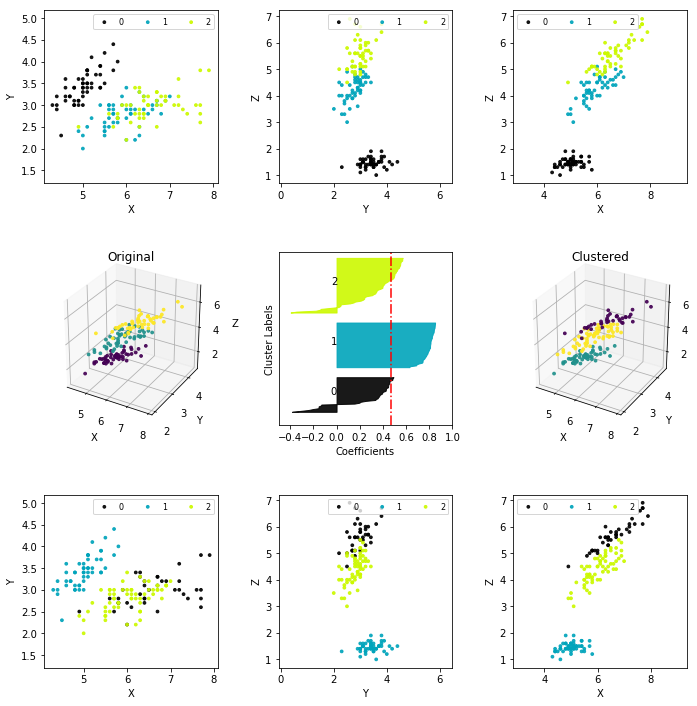

In [13]:
iris3d_gmm = analyse_3d_dataset_one(iris_012, algorithm='GMM')

Number of smaples in each clusters: 
 (array([0, 1, 2], dtype=int32), array([50,  2, 98], dtype=int64))


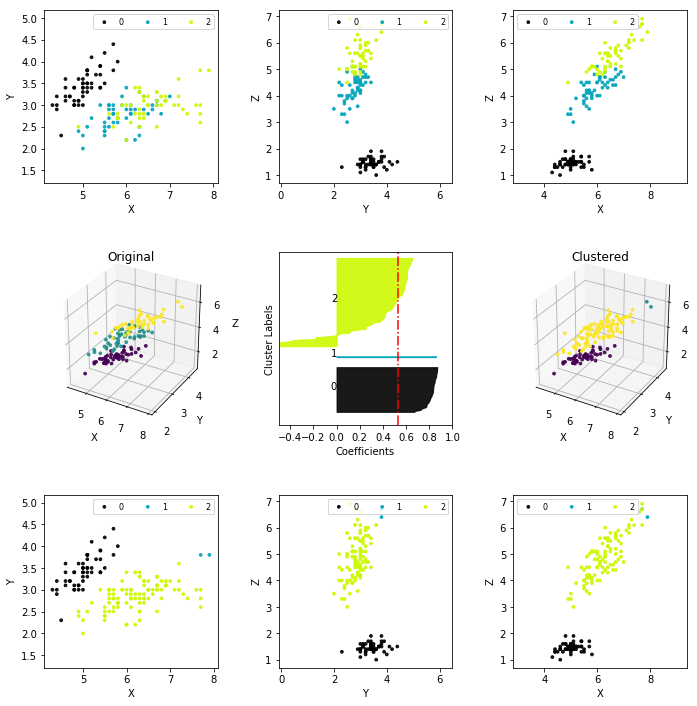

In [14]:
iris3d_asl = analyse_3d_dataset_one(iris_012, algorithm='ASL')

Number of smaples in each clusters: 
 (array([0, 1, 2], dtype=int32), array([70, 30, 50], dtype=int64))


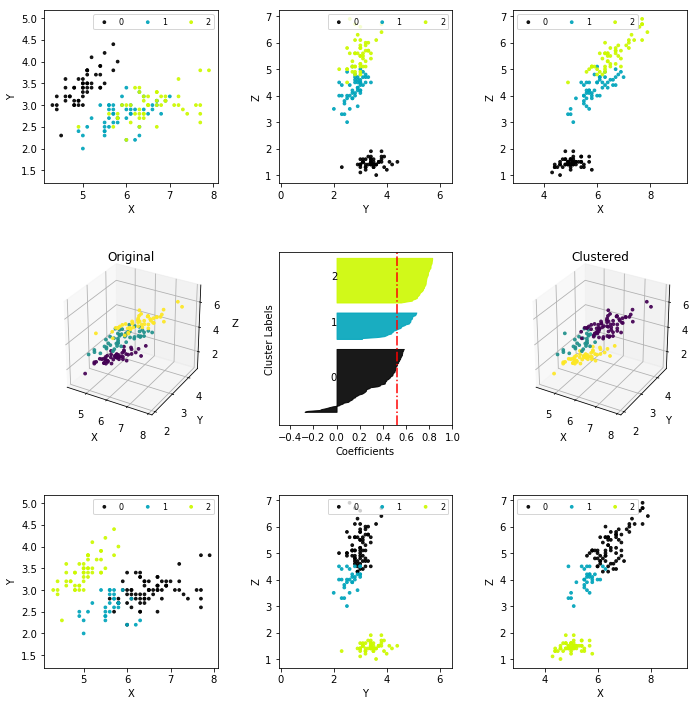

In [15]:
iris3d_acl = analyse_3d_dataset_one(iris_012, algorithm='ACL')

Slightely improved the results compared to ASL

Number of smaples in each clusters: 
 (array([0, 1, 2], dtype=int32), array([50, 12, 88], dtype=int64))


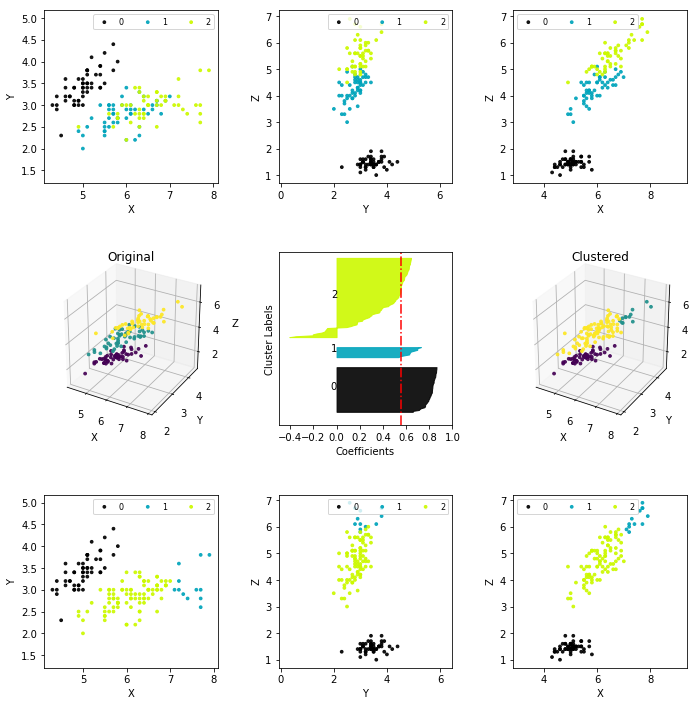

In [16]:
iris3d_aal = analyse_3d_dataset_one(iris_012, algorithm='AAL')

Number of smaples in each clusters: 
 (array([0, 1, 2], dtype=int32), array([50, 32, 68], dtype=int64))


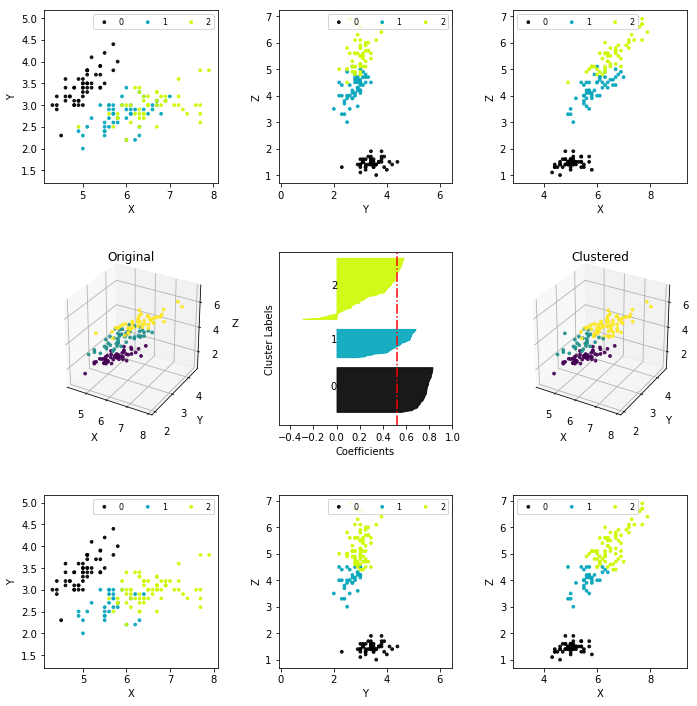

In [17]:
iris3d_awl = analyse_3d_dataset_one(iris_012, algorithm='AWL')

`Using only first two feature dimensions`

In [45]:
iris_01 = iris[0][:, (0,1)], iris[1]
dataset_iris_01 = [(iris_01, {'name': 'iris', 'n_cluster': 4})]
result_01, y_pred_01 = effect_of_dataset_properties_multi(dataset_iris_01)


Dataset iris =====

Optimizing Kmean Parameters =====

Total Parameter Settings:  4


  algorithm       init  n_clusters  score_l2
0      full  k-means++           2  0.462955
1      full  k-means++           3  0.445053
2      full  k-means++           4  0.411679
3      full  k-means++           5  0.407764

Optimizing Agglomerative Parameters =====

Total Parameter Settings:  4


    affinity linkage  n_clusters  score_l2
0  euclidean  single           2  0.431843
1  euclidean  single           3  0.132065
2  euclidean  single           4  0.003810
3  euclidean  single           5  0.233133

Optimizing Agglomerative Parameters =====

Total Parameter Settings:  4


    affinity   linkage  n_clusters  score_l2
0  euclidean  complete           2  0.392020
1  euclidean  complete           3  0.202303
2  euclidean  complete           4  0.361733
3  euclidean  complete           5  0.399646

Optimizing Agglomerative Parameters =====

Total Parameter Settings:  4


    affinity  linkage  

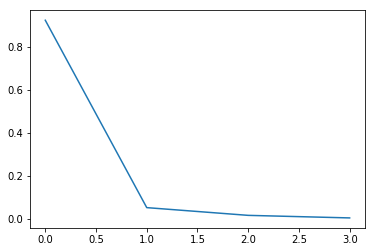

In [40]:
# Apply PCA to visualize data in 2D
pca = decomposition.PCA()
pca_dims = pca.fit_transform(iris[0])
plt.plot(pca.explained_variance_ratio_);

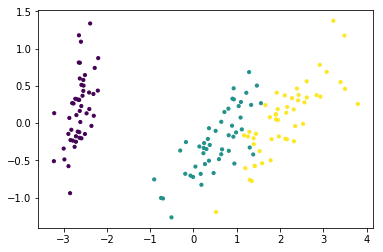

In [41]:
# 1st and 2nd PCs:
plt.scatter(pca_dims[:,0], pca_dims[:,1], c=iris[1], s=10)
plt.show()